# JPEG RD curve

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import image_3 as image
import distortion
import pylab
import PIL
import os

In [5]:
test_image = "../sequences/lena_color/"

In [6]:

xx = image.read(test_image, 0).astype(np.uint8)
JPEG_RD_points = []
for q in range(75):
    im = PIL.Image.fromarray(xx)
    im.save("/tmp/1.jpeg", quality=q, subsampling=0) # No color subsampling
    BPP = os.path.getsize("/tmp/1.jpeg")*8/xx.size
    zz = np.asarray(PIL.Image.open("/tmp/1.jpeg"))
    MSE = distortion.MSE(xx, zz)
    JPEG_RD_points.append((BPP, MSE))
    print(BPP, MSE)

image_3.read: ../sequences/lena_color/000.png (512, 512, 3) uint8 512673 
0.090728759765625 450.026860555013
0.090728759765625 450.026860555013
0.09073893229166667 449.80842717488605
0.09381103515625 423.2561225891113
0.098663330078125 292.75262959798175
0.10465494791666667 230.9595184326172
0.11031087239583333 167.95446268717447
0.116180419921875 148.3753801981608
0.12127685546875 126.69544347127278
0.12703450520833334 113.1178805033366
0.13264973958333334 101.09160486857097
0.13841756184895834 93.630433400472
0.14342244466145834 86.96230697631836
0.14890543619791666 80.47912979125977
0.153717041015625 75.95446904500325
0.159027099609375 72.07749811808269
0.16414388020833334 68.24262237548828
0.16941324869791666 65.4866205851237
0.174346923828125 62.12312316894531
0.17913818359375 60.27862421671549
0.18346150716145834 58.16610972086588
0.18878173828125 55.591156005859375
0.19340006510416666 54.313720703125
0.19786580403645834 52.681044260660805
0.20267740885416666 51.21107864379883
0.

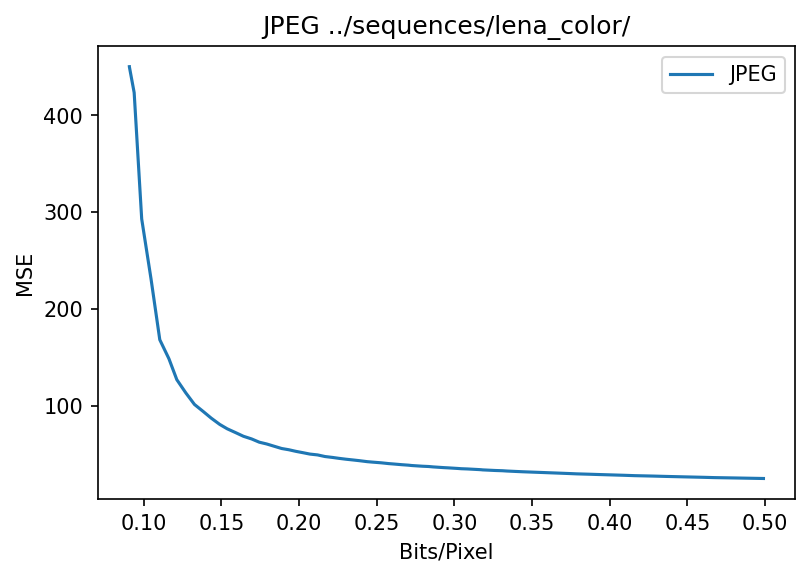

In [7]:
pylab.figure(dpi=150)
pylab.plot(*zip(*JPEG_RD_points), label="JPEG")
pylab.title(f"JPEG {test_image}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("MSE")
plt.legend(loc="best")
pylab.show()

In [8]:
with open('JPEG.txt', 'w') as f:
    for item in JPEG_RD_points:
        f.write(f"{item[0]}\t{item[1]}\n")